# TASK 2

you will use ParticleNet’s data for Quark/Gluon jet classification available here with its corresponding description. 

● Choose 2 Graph-based architectures of your choice to classify jets as being quarks or gluons. Provide a description on what considerations you have taken to project this point-cloud dataset to a set of interconnected nodes and edges.

● Discuss the resulting performance of the 2 chosen architectures. 

here are the details of the data set
There are 20 files in each dataset, each in compressed NumPy format. Files including charm and bottom jets have 'withbc' in their filename.
There are two arrays in each file 

$X: (100000,M,4)$, exactly 50k quark and 50k gluon jets, randomly sorted, where M is the max multiplicity of the jets in that file (other jets have been padded with zero-particles), and the features of each particle are its pt, rapidity, azimuthal angle, and pdgid.

$y: (100000,)$, an array of labels for the jets where gluon is 0 and quark is 1


Since I'm using colab as the environment to run my notebooks, there is a limitation in the amount of memory and as the dataset is big enough I'll not be using files 'withbc'

In [1]:
!pip install --upgrade pip
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import logging
logging.basicConfig(level=logging.INFO,
                    format='[%(asctime)s] %(levelname)s: %(message)s')
%matplotlib inline

In [2]:
from tensorflow import keras
from tf_keras_model import get_particle_net, get_particle_net_lite
# from tf_keras_model_static import get_particle_net_static, get_particle_net_lite_static

In [3]:
def dataset_padding(X_1, X_2, y_1, y_2):
    if X_1.shape[1] != X_2.shape[1]:
        if X_1.shape[1] > X_2.shape[1]:
            X_2 = np.concatenate((X_2,np.zeros((X_2.shape[0], X_1.shape[1]-X_2.shape[1], X_2.shape[2]))), axis=1)
        else:
            X_1 = np.concatenate((X_1,np.zeros((X_1.shape[0], X_2.shape[1]-X_1.shape[1], X_1.shape[2]))), axis=1)

        X_1 = np.concatenate((X_1,X_2), axis=0)
        y_1 = np.concatenate((y_1,y_2), axis=0)

    return X_1, y_1
     

In [5]:
!wget https: // zenodo.org/record/3164691/files/QG_jets.npz - P / content/data/

--2023-03-26 09:04:56--  ftp://https/
           => ‘.listing’
Resolving https (https)... failed: Name or service not known.
wget: unable to resolve host address ‘https’
//: Scheme missing.
--2023-03-26 09:04:56--  http://zenodo.org/record/3164691/files/QG_jets.npz
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://zenodo.org/record/3164691/files/QG_jets.npz [following]
--2023-03-26 09:04:57--  https://zenodo.org/record/3164691/files/QG_jets.npz
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106689379 (102M) [application/octet-stream]
Saving to: ‘QG_jets.npz’

QG_jets.npz         100%[===================>] 101.75M  17.6MB/s    in 7.4s    

2023-03-26 09:05:05 (13.8 MB/s) - ‘QG_jets.npz’ saved [106689379/106689379]

--2023-03-26 09:05:05--  http://-/
Resolvin

In [4]:
with np.load('./QG_jets.npz') as data:
    X_train = data["X"]
    y_train = data["y"]

In [7]:
!wget https: // zenodo.org/record/3164691/files/QG_jets_1.npz - P / content/data/
!wget https: // zenodo.org/record/3164691/files/QG_jets_2.npz - P / content/data/

--2023-03-26 09:05:10--  ftp://https/
           => ‘.listing’
Resolving https (https)... failed: Name or service not known.
wget: unable to resolve host address ‘https’
//: Scheme missing.
--2023-03-26 09:05:10--  http://zenodo.org/record/3164691/files/QG_jets_1.npz
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://zenodo.org/record/3164691/files/QG_jets_1.npz [following]
--2023-03-26 09:05:10--  https://zenodo.org/record/3164691/files/QG_jets_1.npz
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106477587 (102M) [application/octet-stream]
Saving to: ‘QG_jets_1.npz’

QG_jets_1.npz       100%[===================>] 101.54M  18.1MB/s    in 6.8s    

2023-03-26 09:05:19 (14.8 MB/s) - ‘QG_jets_1.npz’ saved [106477587/106477587]

--2023-03-26 09:05:19--  http://-

In [8]:
for i in range(2):
  with np.load('./QG_jets_' + str(i+1) + '.npz') as data:
        temp_X = data["X"]
        temp_y = data["y"]
        print("Dataset QG_jets_" + str(i+1) + ".npz has been loaded.")
        X_train, y_train = dataset_padding(X_train, temp_X, y_train, temp_y)

Dataset QG_jets_1.npz has been loaded.
Dataset QG_jets_2.npz has been loaded.


### pre-requisites
In high-energy collisions, quarks and gluons are produced in the form of jets, which are streams of particles that are created when a quark or gluon fragments into a shower of other particles. These showers of particles are then detected by particle detectors, which record the energy and direction of each particle.

Quarks and gluons have different properties, which can be used to distinguish them. Quarks, for example, carry a fractional electric charge, while gluons are neutral. Quarks also have a larger mass than gluons, which means that they tend to produce more energetic jets.





I'll mainly be following the architecture from [Jet tagging via particle clouds](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.101.056019)

### Understanding Data

Each file has 100k jets, exactly 50k quark and 50k gluon jets, randomly sorted (label imbalance is not an issue). Every jet in the file contains $M
 × F$
 data where 
 $M$ is the maximum number of multiplicity of the jets in the file and 
 $F$ is the number of each particle's features (pt, rapidity, azimuthal angle, and pdgid/Particle Data Group ID). So, in total, 100k jets are used in this each file with total of 18 files.

 Due to high computational needs, I'll just be using 1 file.

In [5]:
# one hot encoding labels is needed else the following error
# ValueError: Shapes (None, 1) and (None, 2) are incompatible
y_train = tf.keras.utils.to_categorical(y_train)
print(y_train.shape)

(100000, 2)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

As per reference [2] I split the data into the following:
- 80% - Testing ( ≈ 80k values)
- 10% - Validation ( ≈ 10k values)
- 10% - Testing ( ≈ 10k values)

In [7]:

X_train, y_train = shuffle(X_train, y_train, random_state=2023)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=2023)

print("Train dataset shape:", X_train.shape, y_train.shape)
print("Val dataset shape:", X_val.shape, y_val.shape)
print("Test dataset shape:", X_test.shape, y_test.shape)

Train dataset shape: (80000, 139, 4) (80000, 2)
Val dataset shape: (10000, 139, 4) (10000, 2)
Test dataset shape: (10000, 139, 4) (10000, 2)


### Architecture 

I have looked through the following three architectures from the corresponding papers.

1. **ABCnet** - It is a graph attention pooling layer (GAPLayer) that transforms the feature vectors into a higher dimensional space and passes the feature vectors to the attention layer with attention coefficients as part of an attention-based features update approach.

 Because the attention mechanism takes into account the local features needed for better classification performance, this is advantageous for quark gluon tagging.

  the following is it's architecture from reference [1]
  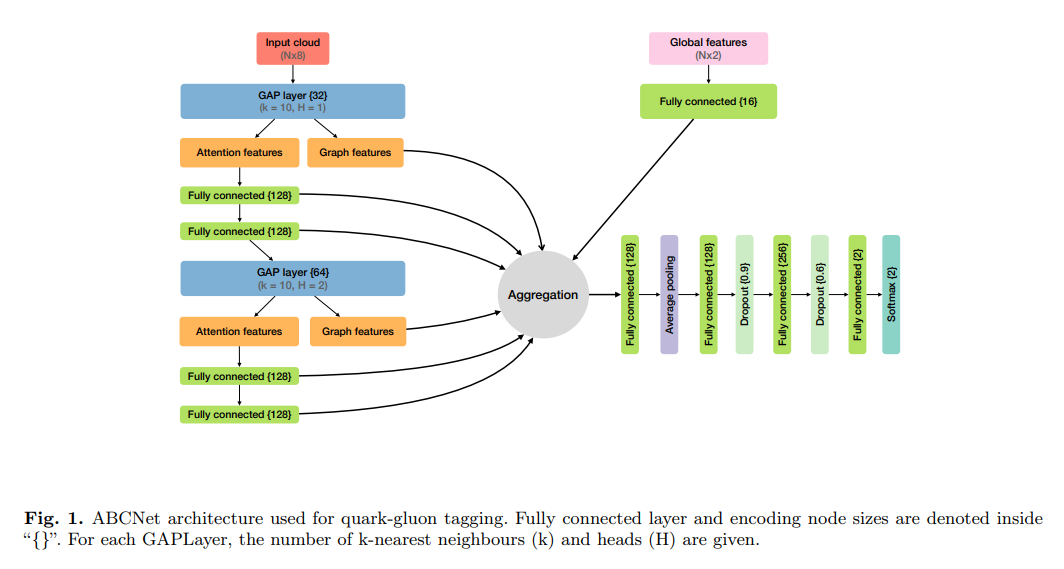

  2. **ParticleNet** - The ParticleNet architecture, which operates on data representing the subatomic particles produced by LHC collisions, is built on a combination of convolutional neural networks (CNNs) and graph neural networks (GNNs). A collection of particles that are each represented by a vector of features, such as energy, momentum, and direction, make up the network's input.
  
    A set of output features that can be used for particle identification, energy estimation, and other tasks are produced by the network after it processes this input and finds patterns and relationships between the particles.

    ParticleNet uses graph neural networks as one of its main innovations to capture the intricate relationships between particles.

    The network builds a graph in which the particles are the nodes and the edges stand in for their pairwise connections. The GNN then performs its operations on this graph, relaying data between nodes and utilising graph convolutions to extract more complex features.

    ParticleNet has been demonstrated to perform at the cutting edge on a variety of particle physics tasks, including jet energy estimation and particle identification. It performs particularly well in tasks where the spatial and temporal correlations between particles are significant due to its capacity to capture the complex relationships between particles.

  The architecture it follows is:

  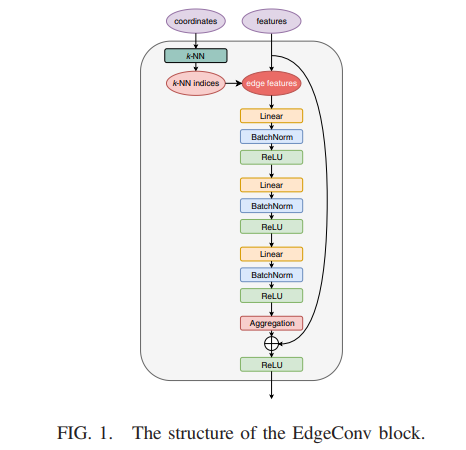
    
    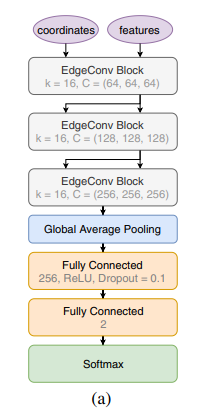

3. **particleNet lite** - is fundamentally similar to particle that use the power of EdgeConv to parameterize over local dependencies in the point-cloud representation. it uses the following architecture.

  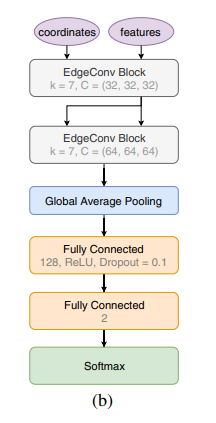

I'll be implementing particleNet and particleNet Lite

The code implementation is referenced from [link](https://github.com/hqucms/ParticleNet)

Equation below defines an EdgeConv operation on a point $x_{i}$ used in reference[2]. 

$$
\boldsymbol{x}_{i}^{\prime}=\frac{1}{k}\sum_{j=1}^{k} h_{\Theta}\left(\boldsymbol{x}_{i}, \boldsymbol{x}_{i_{j}}-\boldsymbol{x}_{i}\right)
$$
where $\boldsymbol{x}_{i}$ is the feature vector of the point $x_{i}$, $\boldsymbol{x}_{i_{j}}$ denoted the feature vector of the k nearest neighboring points of point $x_{i}$ with index $j$, and $h_{\Theta}$ is a multilayer perceptron whose parameters are shared between all edges. One time of this operation application is depicted as an "EdgeConv block" in the **Figure 2(a) and 2(b)**.

Reference [2] explains how they "dynamically" update the graph along the network. At the start of each EdgeConv block, the set of k nearest neighbouring particles for each particle is updated. While the remaining blocks will use the learned feature vectors from the prior block as coordinates, the first block will use the rapidity and azimuthal angle to determine the distances.

## Code implementation

According to the reference link:

The ParticleNet model can be obtained by calling the `get_particle_net` function in [particle_net.py](mxnet/particle_net.py), which can return either an MXNet `Symbol` or an MXNet Gluon `HybridBlock`. The model takes three input arrays:
 - `points`: the coordinates of the particles in the (eta, phi) space. It should be an array with a shape of (N, 2, P), where N is the batch size and P is the number of particles.
 - `features`: the features of the particles. It should be an array with a shape of (N, C, P), where N is the batch size, C is the number of features, and P is the number of particles.
 - `mask`: a mask array with a shape of (N, 1, P), taking a value of 0 for padded positions.

So we have to create a dictionary that contains the "points", "features", and "mask" array for training set, validation set, and testing set.

In [8]:
num_samples = X_train.shape[0]
num_particles = X_train.shape[1]
num_features = X_train.shape[2]

In [9]:
train_dict = {
    # the coordinates of the particles in the (eta, phi) space (shape=num_samples,num_particles,2)
    'points': X_train[:, :, 1:3],
    # the features of the particles (shape=num_samples,num_particles,num_features)
    'features': X_train,
    # a mask array, taking a value of 0 for padded positions (shape=num_samples,num_particles,1)
    'mask': np.sum(X_train, axis=2).reshape(len(X_train), num_particles, 1)
}

val_dict = {
    'points': X_val[:, :, 1:3],
    'features': X_val,
    'mask': np.sum(X_val, axis=2).reshape(len(X_val), num_particles, 1)
}

test_dict = {
    'points': X_test[:, :, 1:3],
    'features': X_test,
    'mask': np.sum(X_test, axis=2).reshape(len(X_test), num_particles, 1)
}

In [10]:
model_type = 'particle_net_lite'
num_classes = 2
input_shapes = {k:train_dict[k].shape[1:] for k in train_dict}

if 'lite' in model_type:
    model_dynamic = get_particle_net_lite(num_classes, input_shapes)
else:
    model_dynamic = get_particle_net(num_classes, input_shapes)

print("Input shapes:", input_shapes)

Input shapes: {'points': (139, 2), 'features': (139, 4), 'mask': (139, 1)}


In [11]:
# Training parameters
batch_size = 1024 if 'lite' in model_type else 384
epochs = 20

In [12]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    elif epoch > 20:
        lr *= 0.01
    logging.info('Learning rate: %f'%lr)
    return lr

In [13]:
model_dynamic.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr_schedule(0)),
              metrics=['accuracy', tf.keras.metrics.AUC()])
model_dynamic.summary()

Model: "ParticleNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 mask (InputLayer)              [(None, 139, 1)]     0           []                               
                                                                                                  
 tf.math.not_equal (TFOpLambda)  (None, 139, 1)      0           ['mask[0][0]']                   
                                                                                                  
 tf.cast (TFOpLambda)           (None, 139, 1)       0           ['tf.math.not_equal[0][0]']      
                                                                                                  
 tf.math.equal (TFOpLambda)     (None, 139, 1)       0           ['tf.cast[0][0]']                
                                                                                        

In [14]:
lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)
progress_bar = keras.callbacks.ProgbarLogger()
callbacks = [lr_scheduler, progress_bar]

In [15]:
# train 
history_dgcnn = model_dynamic.fit(train_dict, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_dict, y_val),
          shuffle=True,
          callbacks=callbacks)

Epoch 1/20
79/79 [==============================] - 768s 10s/sample - loss: 0.5173 - accuracy: 0.7538 - auc: 0.8258 - val_loss: 0.6120 - val_accuracy: 0.6124 - val_auc: 0.7172 - lr: 0.0010
Epoch 2/20
79/79 [==============================] - 768s 10s/sample - loss: 0.4786 - accuracy: 0.7776 - auc: 0.8527 - val_loss: 0.5200 - val_accuracy: 0.7633 - val_auc: 0.8388 - lr: 0.0010
Epoch 3/20
79/79 [==============================] - 795s 10s/sample - loss: 0.4733 - accuracy: 0.7789 - auc: 0.8562 - val_loss: 0.4894 - val_accuracy: 0.7794 - val_auc: 0.8527 - lr: 0.0010
Epoch 4/20
79/79 [==============================] - 767s 10s/sample - loss: 0.4680 - accuracy: 0.7837 - auc: 0.8598 - val_loss: 0.5030 - val_accuracy: 0.7593 - val_auc: 0.8358 - lr: 0.0010
Epoch 5/20
79/79 [==============================] - 769s 10s/sample - loss: 0.4655 - accuracy: 0.7857 - auc: 0.8614 - val_loss: 0.4670 - val_accuracy: 0.7874 - val_auc: 0.8606 - lr: 0.0010
Epoch 6/20
79/79 [==============================] - 790

In [ ]:
import csv

w = csv.writer(open("./train_history_dgcnn.csv", "w"))
for key, val in history_dgcnn.history.items():
    w.writerow([key, val])

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
%cd '/content/drive/MyDrive/Projects/GSOC'

/content/drive/MyDrive/Projects/GSOC


In [25]:
# save the last model
model_dynamic.save("./model_save/model_dynamic")


In [34]:
import pandas as pd
history_dgcnn = pd.read_csv('/content/train_history_dgcnn.csv')

print(history_dgcnn)

           loss  \
0      accuracy   
1           auc   
2      val_loss   
3  val_accuracy   
4       val_auc   
5            lr   

  [0.5173160433769226, 0.4785763621330261, 0.473297119140625, 0.46799105405807495, 0.4654964208602905, 0.46165668964385986, 0.4576851427555084, 0.452243834733963, 0.4502205550670624, 0.44618144631385803, 0.445188045501709, 0.4397844672203064, 0.43739253282546997, 0.4371107816696167, 0.4366796016693115, 0.4357697367668152, 0.43559184670448303, 0.4355100095272064, 0.434535413980484, 0.4345867335796356]  
0  [0.7538250088691711, 0.7776125073432922, 0.778...                                                                                                                                                                                                                                                                                                                                                                 
1  [0.8258203268051147, 0.8526511192321777, 0.856...  

### Conclusion

the final results are as follows:
- **Loss** : 0.4346
- **Accuracy** : 0.8063
- **auc** : 0.8810
- **validation loss** : 0.4446
- **validation accuracy** : 0.7980
- **validation auc** : 0.8753

Due to the lac of computation the results ended up not so appealing. the training almost took 2-3 hours to complete just for 1 file, i.e. 100k values.

My initial considerations were that I'll be using 10 files, so I chose particle net, but for lower values ABCnet is also a good approach. 

Using particleNet lite would definetly decrease the training time.

### Reference

1. [ABCNet: An attention-based method for particle tagging](https://arxiv.org/pdf/2001.05311.pdf)
2. [Jet tagging via particle clouds](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.101.056019)